In [4]:
import sys
# sys.path.insert(0,'/home/jovyan/home/emu_CAMELS/')
sys.path.append('/home/jovyan/home/emu_CAMELS/scripts/1P_emulator/')
sys.path.append('/home/jovyan/home/src/ostrich')


import pality
import ostrich.emulate
import helper_functions_1P as fs

import numpy as np

ModuleNotFoundError: No module named 'dill'

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl

matplotlib.rcParams['figure.figsize']=[5.0, 5.0]
matplotlib.rcParams['figure.dpi']=100
matplotlib.rcParams['font.size']=14

In [4]:
home='/home/jovyan/home/emu_CAMELS/emulator_profiles/1P_set/' #point to your profiles
suite='SIMBA'
vary_str='ASN1'
prof='rho_mean' #rho_mean,rho_med,pth_mean,pth_med
func_str='linear' #this is the Rbf interpolation function

mass=fs.mass
mass_str=fs.mass_str
snap=fs.snap
z=fs.choose_redshift(suite)
vary,sims=fs.choose_vary(vary_str)
samples=fs.cartesian_prod(vary,z,mass) 
nsamp=samples.shape[0]

samples,x,y,emulator=fs.build_emulator_3D(home,suite,vary_str,prof,func_str)

#now we can get an emulated profile with different parameters
A = 0.7 # feedback parameter
z = 0.2 # redshift
logM = 13.7 # halo mass in log10 Msun

params=[[A, z, logM]] #the order here is important- A, then z, then logM
log10_emulated_rho_mean = emulator(params)

Text(0, 0.5, '$\\rho [{\\rm g\\, cm^{-3}}]$')

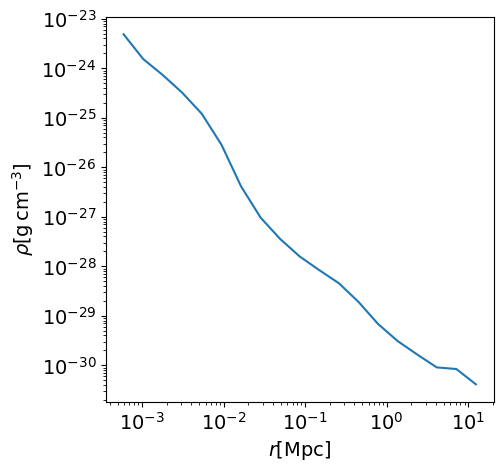

In [5]:
plt.loglog(x,10**log10_emulated_rho_mean)
plt.xlabel(r'$r [{\rm Mpc}]$')
plt.ylabel(r'$\rho [{\rm g\, cm^{-3}}]$')